In [184]:
import pandas as pd 
data=pd.read_excel("/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx",sheet_name="E Comm")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [185]:
data.describe()


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [186]:
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [187]:
features=["Tenure","WarehouseToHome","HourSpendOnApp","OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder"]
#data.drop(features)
#we are filling the data with median instead of just removing it 
#because missing data rate in percentage for every column is 5 to 8%
#which is very less,so instead of removing the data, you can fill it with median
for feature in features:
    data[feature].fillna(data[feature].median(),inplace=True)

/tmp/ipykernel_36/3253883604.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].fillna(data[feature].median(),inplace=True)


In [188]:
data.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [189]:
for col in data.columns:
    print(col)
    print(data[col].unique())
    print()

CustomerID
[50001 50002 50003 ... 55628 55629 55630]

Churn
[1 0]

Tenure
[ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]

PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']

CityTier
[3 1 2]

WarehouseToHome
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]

PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender
['Female' 'Male']

HourSpendOnApp
[3. 2. 1. 0. 4. 5.]

NumberOfDeviceRegistered
[3 4 5 2 1 6]

PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

SatisfactionScore
[2 3 5 4 1]

MaritalStatus
['Single' 'Divorced' 'Married']

NumberOfAddress
[ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]

Complain
[1 0]

OrderAmountHikeFromlastYear
[11. 15. 14. 23. 22. 16. 12. 13

In [190]:
print(data["PreferredLoginDevice"].value_counts())
data["PreferredLoginDevice"]=data["PreferredLoginDevice"].replace("Phone","Mobile Phone")
print(data["PreferredLoginDevice"].value_counts())

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64


In [191]:
print(data["PreferredPaymentMode"].value_counts())
data["PreferredPaymentMode"]=data["PreferredPaymentMode"].replace("CC","Credit Card")
print(data["PreferredPaymentMode"].value_counts())

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
UPI                  414
COD                  365
Cash on Delivery     149
Name: count, dtype: int64


In [192]:
print(data["PreferredPaymentMode"].value_counts())
data["PreferredPaymentMode"]=data["PreferredPaymentMode"].replace("Cash on Delivery","COD")
print(data["PreferredPaymentMode"].value_counts())

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
UPI                  414
COD                  365
Cash on Delivery     149
Name: count, dtype: int64
PreferredPaymentMode
Debit Card     2314
Credit Card    1774
E wallet        614
COD             514
UPI             414
Name: count, dtype: int64


In [193]:
print(data["PreferedOrderCat"].value_counts())
data["PreferedOrderCat"]=data["PreferedOrderCat"].replace("Mobile","Mobile Phone")
print(data["PreferedOrderCat"].value_counts())

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64
PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64


In [194]:
#we need to convert these categories into numbers, 
#because model only understands the numbers not text
data.replace({"PreferredLoginDevice":{"Mobile Phone":0,"Computer":1}},inplace=True)
print(data["PreferredLoginDevice"].value_counts())

PreferredLoginDevice
0    3996
1    1634
Name: count, dtype: int64


/tmp/ipykernel_36/2301706745.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"PreferredLoginDevice":{"Mobile Phone":0,"Computer":1}},inplace=True)


In [195]:
print(data["Gender"].value_counts())
data.replace({"Gender":{"Male":0,"Female":1}},inplace=True)
print(data["Gender"].value_counts())

Gender
Male      3384
Female    2246
Name: count, dtype: int64
Gender
0    3384
1    2246
Name: count, dtype: int64


/tmp/ipykernel_36/2628286562.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"Gender":{"Male":0,"Female":1}},inplace=True)


In [196]:
data["Churn"].value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='CashbackAmount'>

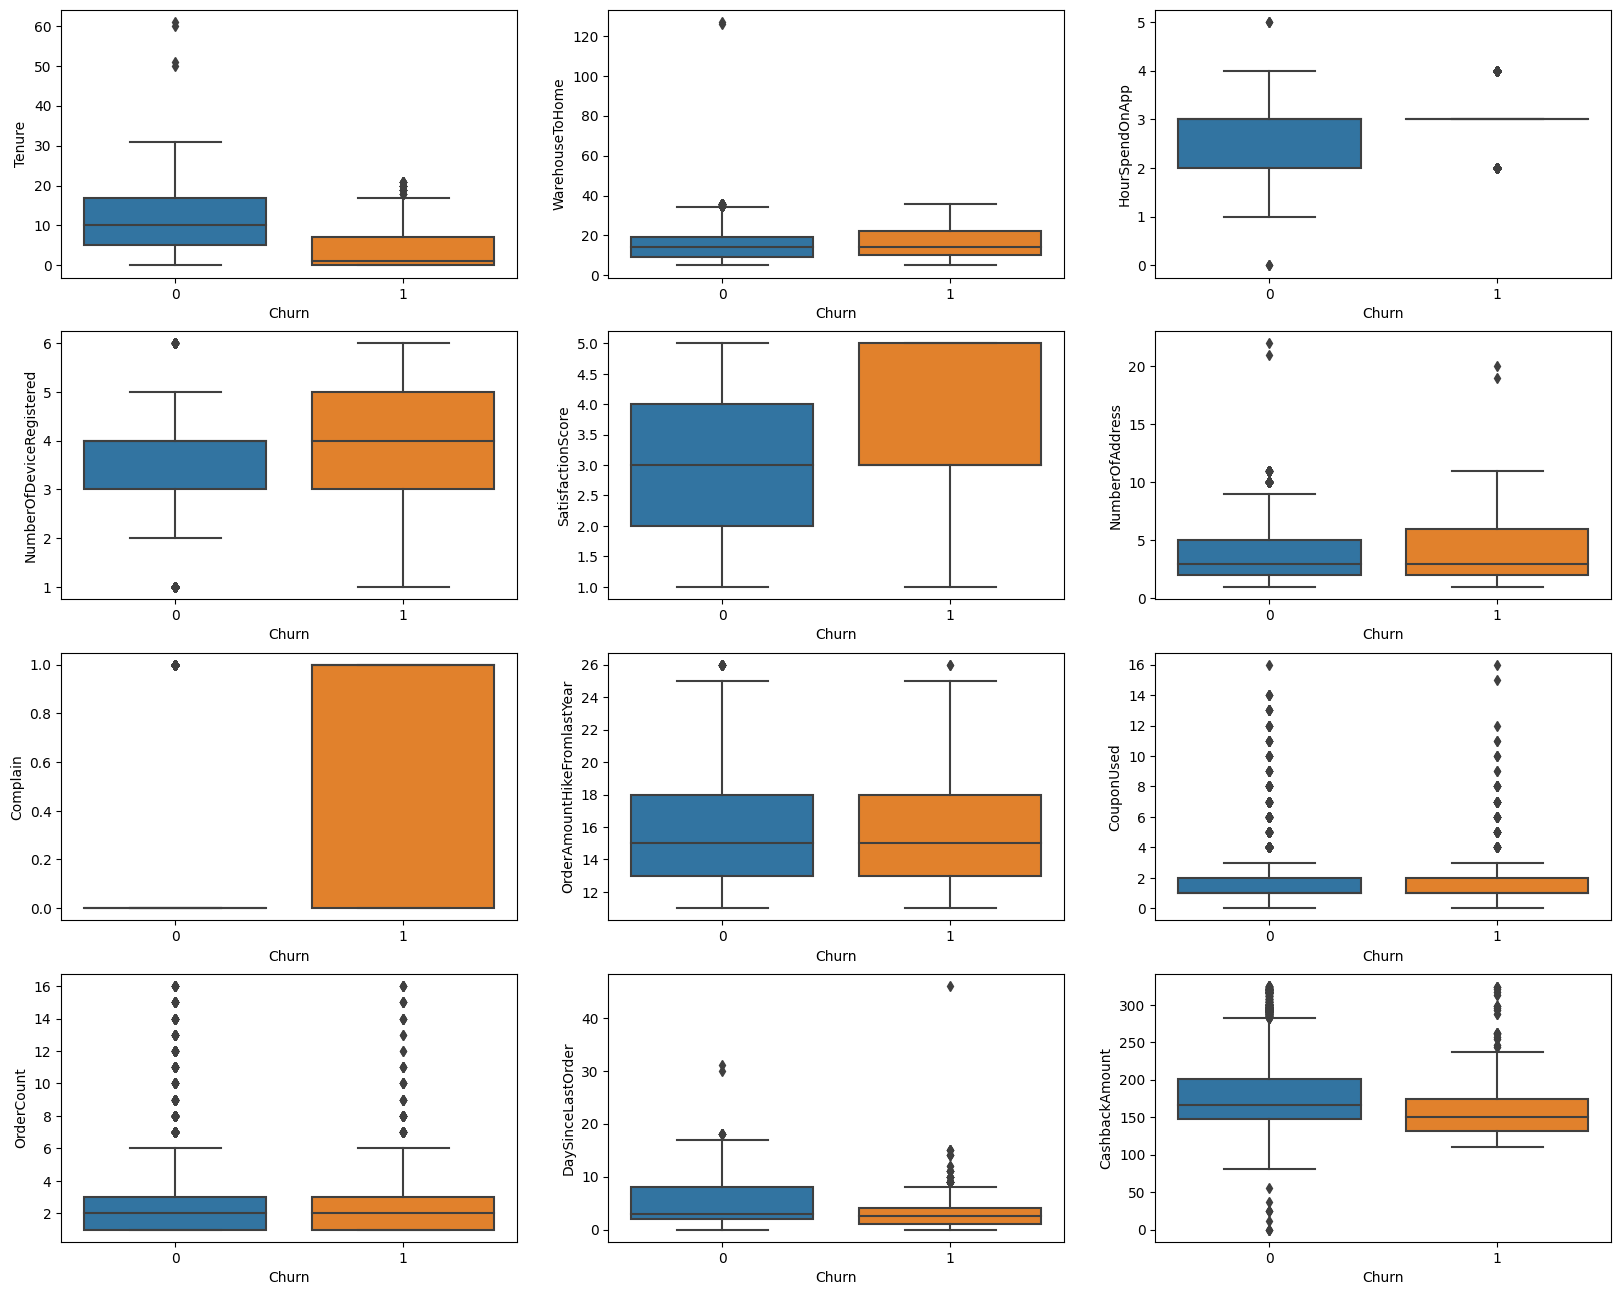

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,16))
plt.subplot(4,3,1)
sns.boxplot(x="Churn",y="Tenure",data=data)

plt.subplot(4,3,2)
sns.boxplot(x="Churn",y="WarehouseToHome",data=data)

plt.subplot(4,3,3)
sns.boxplot(x="Churn",y="HourSpendOnApp",data=data)

plt.subplot(4,3,4)
sns.boxplot(x="Churn",y="NumberOfDeviceRegistered",data=data)

plt.subplot(4,3,5)
sns.boxplot(x="Churn",y="SatisfactionScore",data=data)

plt.subplot(4,3,6)
sns.boxplot(x="Churn",y="NumberOfAddress",data=data)

plt.subplot(4,3,7)
sns.boxplot(x="Churn",y="Complain",data=data)

plt.subplot(4,3,8)
sns.boxplot(x="Churn",y="OrderAmountHikeFromlastYear",data=data)

plt.subplot(4,3,9)
sns.boxplot(x="Churn",y="CouponUsed",data=data)

plt.subplot(4,3,10)
sns.boxplot(x="Churn",y="OrderCount",data=data)

plt.subplot(4,3,11)
sns.boxplot(x="Churn",y="DaySinceLastOrder",data=data)

plt.subplot(4,3,12)
sns.boxplot(x="Churn",y="CashbackAmount",data=data)


In [198]:
categorical_features=["PreferredPaymentMode","PreferedOrderCat","MaritalStatus"]

In [199]:
numerical_features=["Tenure","PreferredLoginDevice","CityTier","WarehouseToHome","Gender","HourSpendOnApp","NumberOfDeviceRegistered","SatisfactionScore","NumberOfAddress","Complain","OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder","CashbackAmount"]

In [200]:
data_features=data[numerical_features+categorical_features+["Churn"]]
print(data_features.head)

<bound method NDFrame.head of       Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  Gender  \
0        4.0                     0         3              6.0       1   
1        9.0                     0         1              8.0       0   
2        9.0                     0         1             30.0       0   
3        0.0                     0         3             15.0       0   
4        0.0                     0         1             12.0       0   
...      ...                   ...       ...              ...     ...   
5625    10.0                     1         1             30.0       0   
5626    13.0                     0         1             13.0       0   
5627     1.0                     0         1             11.0       0   
5628    23.0                     1         3              9.0       0   
5629     8.0                     0         1             15.0       0   

      HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
0                3.0    

In [201]:
from sklearn.model_selection import train_test_split
def func_train_test_split_features(data_features):
    x=data_features.drop("Churn",axis=1)
    x=pd.get_dummies(x,dtype=int)
    y=data_features["Churn"]
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
    print(x.head(10))
    print(x.columns)
    features=list(x.columns)
    return x_train,x_test,y_train,y_test,features


x_train,x_test,y_train,y_test,features=func_train_test_split_features(data_features)
x_train[:5]

   Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  Gender  \
0     4.0                     0         3              6.0       1   
1     9.0                     0         1              8.0       0   
2     9.0                     0         1             30.0       0   
3     0.0                     0         3             15.0       0   
4     0.0                     0         1             12.0       0   
5     0.0                     1         1             22.0       1   
6     9.0                     0         3             11.0       0   
7     9.0                     0         1              6.0       0   
8    13.0                     0         3              9.0       0   
9     9.0                     0         1             31.0       0   

   HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
0             3.0                         3                  2   
1             3.0                         4                  3   
2             2.0              

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1294,15.0,0,1,24.0,0,2.0,3,5,7,1,...,0,0,0,0,1,0,0,0,1,0
3904,18.0,0,1,9.0,1,4.0,2,1,3,1,...,0,0,1,0,0,0,0,0,1,0
3523,1.0,0,1,13.0,0,3.0,5,3,3,0,...,0,0,0,0,0,1,0,1,0,0
2100,18.0,0,3,17.0,1,2.0,3,1,4,0,...,0,0,0,1,0,0,0,0,1,0
4481,5.0,0,3,14.0,0,4.0,4,1,6,0,...,1,0,0,0,1,0,0,0,1,0


In [202]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [203]:
from sklearn.metrics import accuracy_score,classification_report
y_pred=model.predict(x_test)
print("Accuracy: ",accuracy_score(y_pred,y_test))
print("Classification Report: \n",classification_report(y_test,y_pred))

Accuracy:  0.9635879218472468
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       939
           1       0.97      0.81      0.88       187

    accuracy                           0.96      1126
   macro avg       0.97      0.90      0.93      1126
weighted avg       0.96      0.96      0.96      1126



In [204]:
for i in range(50,80):
    new_customer=x_test.iloc[i]
    prediction=model.predict([new_customer])
    print("Churn" if prediction[0]==1 else "Not Churn")

Not Churn
Not Churn
Churn
Not Churn
Not Churn
Churn
Not Churn
Not Churn
Not Churn
Churn
Not Churn
Not Churn
Not Churn
Not Churn
Not Churn
Not Churn
Not Churn
Churn
Not Churn
Not Churn
Churn
Not Churn
Churn
Not Churn
Not Churn
Not Churn
Not Churn
Not Churn
Not Churn
Not Churn


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X

In [205]:
for i in range(50, 80):
    new_customer = x_test.iloc[i]
    # Convert to a single-row DataFrame with proper feature names
    new_customer_df = pd.DataFrame([new_customer], columns=x_test.columns)
    prediction = model.predict(new_customer_df)
    print("Churn" if prediction[0] == 1 else "Not Churn")


Not Churn
Not Churn
Churn
Not Churn
Not Churn
Churn
Not Churn
Not Churn
Not Churn
Churn
Not Churn
Not Churn
Not Churn
Not Churn
Not Churn
Not Churn
Not Churn
Churn
Not Churn
Not Churn
Churn
Not Churn
Churn
Not Churn
Not Churn
Not Churn
Not Churn
Not Churn
Not Churn
Not Churn


# *Doing Second Time***Doing Second time

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier


data2=pd.read_excel("/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx",sheet_name="E Comm")
print(data2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [207]:
print(data2.describe())

         CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min     

In [208]:
data2.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [209]:
features=["Tenure","WarehouseToHome","HourSpendOnApp","OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder"]
for feature in features:
    data2[feature].fillna(data2[feature].median(),inplace=True)
data2.isnull().sum()

/tmp/ipykernel_36/4212563251.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2[feature].fillna(data2[feature].median(),inplace=True)


CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [210]:
for col in data2.columns:
    print(col)
    print(data2[col].unique())
    print()

CustomerID
[50001 50002 50003 ... 55628 55629 55630]

Churn
[1 0]

Tenure
[ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]

PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']

CityTier
[3 1 2]

WarehouseToHome
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]

PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender
['Female' 'Male']

HourSpendOnApp
[3. 2. 1. 0. 4. 5.]

NumberOfDeviceRegistered
[3 4 5 2 1 6]

PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

SatisfactionScore
[2 3 5 4 1]

MaritalStatus
['Single' 'Divorced' 'Married']

NumberOfAddress
[ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]

Complain
[1 0]

OrderAmountHikeFromlastYear
[11. 15. 14. 23. 22. 16. 12. 13

In [211]:
print(data2["PreferredLoginDevice"].value_counts())
print("\nAfter: ")
data2["PreferredLoginDevice"]=data2["PreferredLoginDevice"].replace("Phone","Mobile Phone")
print(data2["PreferredLoginDevice"].value_counts())
print("\n\n")

print(data2["PreferredPaymentMode"].value_counts())
print("\nAfter: ")
data2["PreferredPaymentMode"]=data2["PreferredPaymentMode"].replace("CC","Credit Card")
print(data2["PreferredPaymentMode"].value_counts())
print("\n\n")

print(data2["PreferredPaymentMode"].value_counts())
print("\nAfter: ")
data2["PreferredPaymentMode"]=data2["PreferredPaymentMode"].replace("Cash on Delivery","COD")
print(data2["PreferredPaymentMode"].value_counts())
print("\n\n")

print(data2["PreferedOrderCat"].value_counts())
print("\nAfter: ")
data2["PreferedOrderCat"]=data2["PreferedOrderCat"].replace("Mobile Phone","Mobile")
print(data2["PreferedOrderCat"].value_counts())
print("\n\n")

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

After: 
PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64



PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

After: 
PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
UPI                  414
COD                  365
Cash on Delivery     149
Name: count, dtype: int64



PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
UPI                  414
COD                  365
Cash on Delivery     149
Name: count, dtype: int64

After: 
PreferredPaymentMode
Debit Card     2314
Credit Card    1774
E wallet        614
COD             514
UPI             414
Name: count, dtype: int64



Pr

In [212]:
data2.replace({"Gender":{"Male":0,"Female":1}},inplace=True)
print(data2["Gender"].value_counts())

print("\n\n\n")

data2.replace({"PreferredLoginDevice":{"Mobile Phone":0,"Computer":1}},inplace=True)
print(data2["PreferredLoginDevice"].value_counts())

Gender
0    3384
1    2246
Name: count, dtype: int64




PreferredLoginDevice
0    3996
1    1634
Name: count, dtype: int64


/tmp/ipykernel_36/3828330102.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2.replace({"Gender":{"Male":0,"Female":1}},inplace=True)
/tmp/ipykernel_36/3828330102.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2.replace({"PreferredLoginDevice":{"Mobile Phone":0,"Computer":1}},inplace=True)


In [213]:
for col in data2.columns:
    print(col)
    print(data2[col].unique())
    print()

CustomerID
[50001 50002 50003 ... 55628 55629 55630]

Churn
[1 0]

Tenure
[ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]

PreferredLoginDevice
[0 1]

CityTier
[3 1 2]

WarehouseToHome
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]

PreferredPaymentMode
['Debit Card' 'UPI' 'Credit Card' 'COD' 'E wallet']

Gender
[1 0]

HourSpendOnApp
[3. 2. 1. 0. 4. 5.]

NumberOfDeviceRegistered
[3 4 5 2 1 6]

PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Others' 'Fashion' 'Grocery']

SatisfactionScore
[2 3 5 4 1]

MaritalStatus
['Single' 'Divorced' 'Married']

NumberOfAddress
[ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]

Complain
[1 0]

OrderAmountHikeFromlastYear
[11. 15. 14. 23. 22. 16. 12. 13. 17. 18. 24. 19. 20. 21. 25. 26.]

CouponUsed
[ 1.  0.  4.  2.  9.  6. 11.  7. 1

<Axes: xlabel='Churn', ylabel='CashbackAmount'>

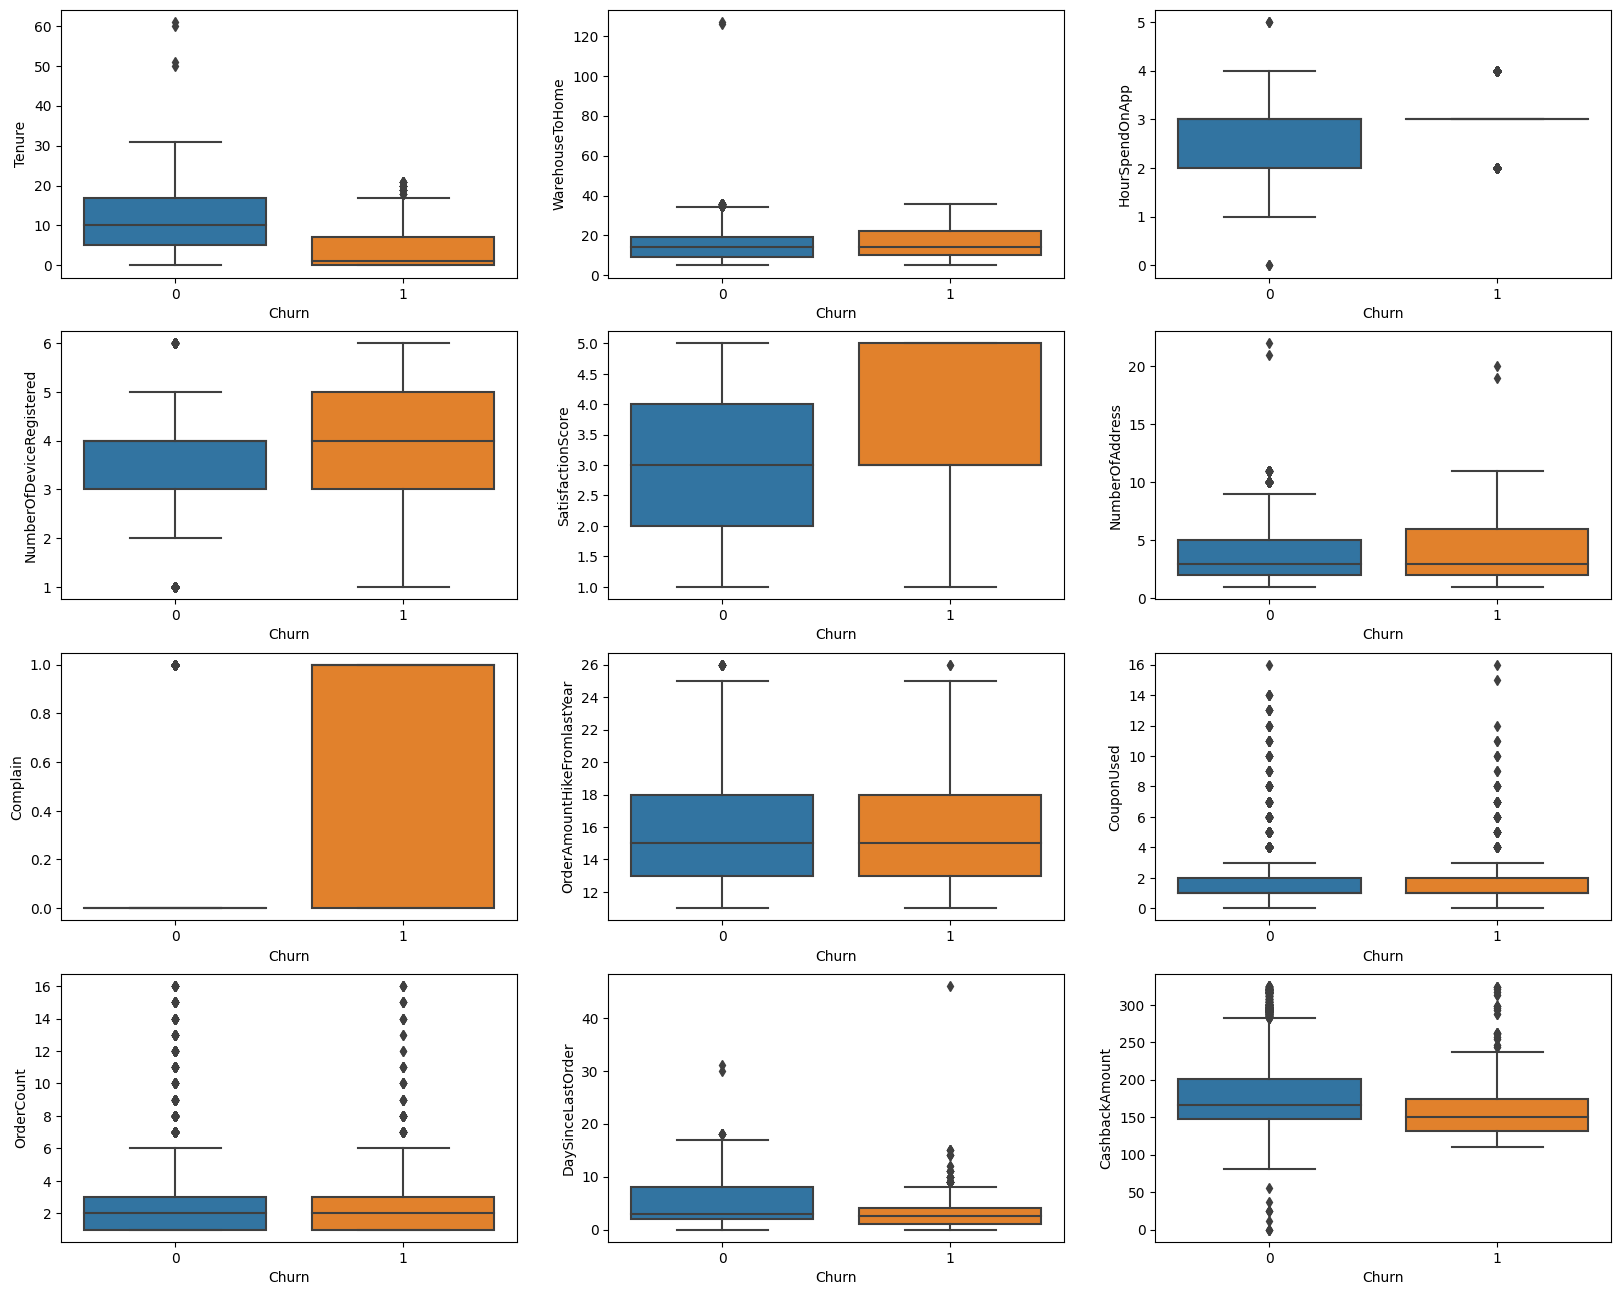

In [214]:
#try to find box plot for those on which churn depends on
plt.figure(figsize=(20,16))
plt.subplot(4,3,1)
sns.boxplot(x="Churn",y="Tenure",data=data2)

plt.subplot(4,3,2)
sns.boxplot(x="Churn",y="WarehouseToHome",data=data2)

plt.subplot(4,3,3)
sns.boxplot(x="Churn",y="HourSpendOnApp",data=data2)

plt.subplot(4,3,4)
sns.boxplot(x="Churn",y="NumberOfDeviceRegistered",data=data2)

plt.subplot(4,3,5)
sns.boxplot(x="Churn",y="SatisfactionScore",data=data2)

plt.subplot(4,3,6)
sns.boxplot(x="Churn",y="NumberOfAddress",data=data2)

plt.subplot(4,3,7)
sns.boxplot(x="Churn",y="Complain",data=data2)

plt.subplot(4,3,8)
sns.boxplot(x="Churn",y="OrderAmountHikeFromlastYear",data=data2)

plt.subplot(4,3,9)
sns.boxplot(x="Churn",y="CouponUsed",data=data2)

plt.subplot(4,3,10)
sns.boxplot(x="Churn",y="OrderCount",data=data2)

plt.subplot(4,3,11)
sns.boxplot(x="Churn",y="DaySinceLastOrder",data=data2)

plt.subplot(4,3,12)
sns.boxplot(x="Churn",y="CashbackAmount",data=data2)


In [215]:
#to arrange the data in proper way
numerical_features=["Tenure","PreferredLoginDevice","CityTier","WarehouseToHome","Gender","HourSpendOnApp","NumberOfDeviceRegistered","SatisfactionScore","NumberOfAddress","Complain","OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder","CashbackAmount"]

categorical_features=["PreferredPaymentMode","PreferedOrderCat","MaritalStatus"]

data2_features=data2[numerical_features+categorical_features+["Churn"]]
print(data2_features[20:30])

    Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  Gender  \
20     0.0                     0         3             12.0       0   
21    20.0                     0         1             29.0       1   
22     9.0                     0         3             28.0       0   
23     0.0                     0         3             26.0       1   
24    14.0                     1         1             14.0       0   
25     0.0                     0         1             15.0       1   
26     8.0                     0         3              6.0       0   
27     9.0                     0         3             12.0       0   
28    18.0                     0         1             14.0       0   
29     5.0                     1         3             14.0       1   

    HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
20             3.0                         5                  3   
21             3.0                         3                  2   
22             2.

In [216]:
x=data2_features.drop("Churn",axis=1)
x=pd.get_dummies(x,dtype=int)
y=data2_features["Churn"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
    

In [217]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [218]:
y_pred=model.predict(x_test)
print("Accuracy: ",accuracy_score(y_pred,y_test))
print("Classification Report: \n",classification_report(y_pred,y_test))

Accuracy:  0.9689165186500888
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       970
           1       0.82      0.99      0.90       156

    accuracy                           0.97      1126
   macro avg       0.91      0.98      0.94      1126
weighted avg       0.97      0.97      0.97      1126



In [219]:
new_customer=x_test.iloc[50]
prediction=model.predict([new_customer])
#To solve the warning
#convert to a single row data frame with a proper feature name
#new_customer_df=pd.DataFrame([new_customer],columns=x_test.columns)
#prediction=model.predict(new_customer_df)
print("Churn" if(prediction==1) else "Not Churn")

Not Churn


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Customer Churn Prediction using Random Forest Classifier

In [12]:
# Step-1:- Import Necessary Libraries
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Step-2:- Load and Explore the dataset
data=pd.read_excel("/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx",sheet_name="E Comm")
print(data.head())
print("\n\n\n\n")
print(data.info())
print("\n\n\n\n")
print(data.isnull().sum())
print("\n\n\n\n")

#Step-3:- Clean and Preprocess the data
#Filling all the null values of each column by its columns' median value
data["Tenure"].fillna(data["Tenure"].median(),inplace=True)
data["WarehouseToHome"].fillna(data["WarehouseToHome"].median(),inplace=True)
data["HourSpendOnApp"].fillna(data["HourSpendOnApp"].median(),inplace=True)
data["OrderAmountHikeFromlastYear"].fillna(data["OrderAmountHikeFromlastYear"].median(),inplace=True)
data["CouponUsed"].fillna(data["CouponUsed"].median(),inplace=True)
data["OrderCount"].fillna(data["OrderCount"].median(),inplace=True)
data["DaySinceLastOrder"].fillna(data["DaySinceLastOrder"].median(),inplace=True)
#print(data.isnull().sum())

#Viewing all the unique data inside each column
for col in data.columns:
    print(col)
    print(data[col].unique())
    print()

#Removing duplicates values in each columns wherever it is given
print("\nBefore:- ")
print(data["PreferredLoginDevice"].value_counts())
data["PreferredLoginDevice"]=data["PreferredLoginDevice"].replace("Phone","Mobile Phone")
print("\nAfter:- ")
print(data["PreferredLoginDevice"].value_counts())


print("\nBefore:- ")
print(data["PreferredPaymentMode"].value_counts())
data["PreferredPaymentMode"]=data["PreferredPaymentMode"].replace("COD","Cash On Delivery")
print("\nAfter:- ")
print(data["PreferredPaymentMode"].value_counts())


print("\nBefore:- ")
print(data["PreferredPaymentMode"].value_counts())
data["PreferredPaymentMode"]=data["PreferredPaymentMode"].replace("CC","Credit Card")
print("\nAfter:- ")
print(data["PreferredPaymentMode"].value_counts())


print("\nBefore:- ")
print(data["PreferedOrderCat"].value_counts())
data["PreferedOrderCat"]=data["PreferedOrderCat"].replace("Mobile","Mobile Phone")
print("\nAfter:- ")
print(data["PreferedOrderCat"].value_counts())

#Step-4:- Converting possible categorical features to numerical features 
data.replace({"PreferredLoginDevice":{"Mobile Phone":0,"Computer":1}},inplace=True)
print(data["PreferredLoginDevice"].value_counts())

data.replace({"Gender":{"Male":0,"Female":1}},inplace=True)
print(data["Gender"].value_counts())

#Step-5:- Separating categorical and numerical features
categorical_features=["PreferredPaymentMode","PreferedOrderCat","MaritalStatus"]
numerical_features=["Tenure","PreferredLoginDevice","CityTier","WarehouseToHome","Gender","HourSpendOnApp","NumberOfDeviceRegistered","SatisfactionScore","NumberOfAddress","Complain","OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder","CashbackAmount"]

#Step-6:- Selecting final feature in sequence
final_features=data[numerical_features+categorical_features+["Churn"]]
print(final_features.head())


#Step-7:- Select input and output feature
x=final_features.drop("Churn",axis=1)
x=pd.get_dummies(x,dtype="int")
y=final_features["Churn"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

#Step-8:- Create and Train the model
rf_model=RandomForestClassifier()
rf_model=rf_model.fit(x_train,y_train)
print("\nModel:- \n",rf_model)

#Step-9:- Test the model
y_pred=rf_model.predict(x_test)

#Step-10:- Model Evaluation
accuracy=accuracy_score(y_pred,y_test)
print("\nAccuracy: \n",accuracy)
confusion_matrix=confusion_matrix(y_test,y_pred)
print("\nConfusion_matrix:- \n",confusion_matrix)
classification_report=classification_report(y_pred,y_test)
print("\nClassification Report: \n",classification_report)

new_customer=x_test.iloc[52]
pred=rf_model.predict([new_customer])
print(pred)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/tmp/ipykernel_36/2331878968.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({c

   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [11]:
new_customer=x_test.iloc[11]
prediction=rf_model.predict([new_customer])
print(prediction)

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Customer Churn Prediction using XGBoost Classifier

In [13]:
#Step-1:- Import Necessary Library
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Step-2:- Load and Explore the dataset
data=pd.read_excel("/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx",sheet_name="E Comm")
print(data.head())
print("\n\n\n\n")
print(data.info())
print("\n\n\n\n")
print(data.isnull().sum())
print("\n\n\n\n")

#Step-3:- Clean and Preprocess the data 
data["Tenure"].fillna(data["Tenure"].median(),inplace=True)
data["WarehouseToHome"].fillna(data["WarehouseToHome"].median(),inplace=True)
data["HourSpendOnApp"].fillna(data["HourSpendOnApp"].median(),inplace=True)
data["OrderAmountHikeFromlastYear"].fillna(data["OrderAmountHikeFromlastYear"].median(),inplace=True)
data["CouponUsed"].fillna(data["CouponUsed"].median(),inplace=True)
data["OrderCount"].fillna(data["OrderCount"].median(),inplace=True)
data["DaySinceLastOrder"].fillna(data["DaySinceLastOrder"].median(),inplace=True)
#print(data.isnull().sum())

for col in data.columns:
    print(col)
    print(data[col].unique())
    print()

print("\nBefore:- ")
print(data["PreferredLoginDevice"].value_counts())
data["PreferredLoginDevice"]=data["PreferredLoginDevice"].replace("Phone","Mobile Phone")
print("\nAfter:- ")
print(data["PreferredLoginDevice"].value_counts())

print("\nBefore:- ")
print(data["PreferredPaymentMode"].value_counts())
data["PreferredPaymentMode"]=data["PreferredPaymentMode"].replace("CC","Credit Card")
print("\nAfter:- ")
print(data["PreferredPaymentMode"].value_counts())

print("\nBefore:- ")
print(data["PreferredPaymentMode"].value_counts())
data["PreferredPaymentMode"]=data["PreferredPaymentMode"].replace("COD","Cash On Delivery")
print("\nAfter:- ")
print(data["PreferredPaymentMode"].value_counts())

print("\nBefore:- ")
print(data["PreferedOrderCat"].value_counts())
data["PreferedOrderCat"]=data["PreferedOrderCat"].replace("Mobile","Mobile Phone")
print("\nAfter:- ")
print(data["PreferedOrderCat"].value_counts())

#Convert possible text feature to numerical feature 
data.replace({"Gender":{"Male":0,"Female":1}})
data.replace({"PrefferedLoginDevice":{"Mobile Phone":0,"Computer":1}})

#Select numerical feature and categorical feature
numerical_feature=["Tenure","PreferredLoginDevice","CityTier","WarehouseToHome","Gender","HourSpendOnApp","NumberOfDeviceRegistered","SatisfactionScore","NumberOfAddress","Complain","OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder","CashbackAmount"]
categorical_features=["PreferredPaymentMode","PreferedOrderCat","MaritalStatus"]

#select final feature by sequence 
final_features=data[numerical_feature+categorical_features+["Churn"]]

#Step-4:- Select input and output features
x=final_features.drop("Churn",axis=1)
y=final_features["Churn"]
#implementing one-hot encoding, to handle categorical value
x=pd.get_dummies(x,dtype="int")

#Step-5:- Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

#Step-6:- Create and train the model
xgb_model=XGBClassifier(n_estimators=200,learning_rate=0.1,max_depth=5,random_state=0,use_label_encoder=False,eval_matric="logloss")
xgb_model.fit(x_train,y_train)
print("\nModel:- \n",xgb_model)

#Step-7:- Test the Model
y_pred=xgb_model.predict(x_test)

#Step-8:- Model Evaluation
print("Accuracy:- ",accuracy_score(y_test,y_pred))

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/tmp/ipykernel_36/4061938014.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({c

   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

Customer Churn Prediction using CatBoost Classifier

In [14]:
#Step-1:- Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import time
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Step-2:- Load and Explore the dataset
data=pd.read_excel("/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx",sheet_name="E Comm")
print(data.head())
print("\n\n\n\n")
print(data.info())
print("\n\n\n\n")
print(data.isnull().sum())
print("\n\n\n\n")

#Step-3:- Clean and Preprocess the data 
#Fill all the null values
data["Tenure"].fillna(data["Tenure"].median(),inplace=True)
data["WarehouseToHome"].fillna(data["WarehouseToHome"].median(),inplace=True)
data["HourSpendOnApp"].fillna(data["HourSpendOnApp"].median(),inplace=True)
data["OrderAmountHikeFromlastYear"].fillna(data["OrderAmountHikeFromlastYear"].median(),inplace=True)
data["CouponUsed"].fillna(data["CouponUsed"].median(),inplace=True)
data["OrderCount"].fillna(data["OrderCount"].median(),inplace=True)
data["DaySinceLastOrder"].fillna(data["DaySinceLastOrder"].median(),inplace=True)
#print(data.isnull().sum())

#Checking unique elements in dataset
for col in data.columns:
    print(col)
    print(data[col].unique())
    print()

#removing duplicates elements in dataset
data["PreferredLoginDevice"]=data["PreferredLoginDevice"].replace("Phone","Mobile Phone")
data["PreferredPaymentMode"]=data["PreferredPaymentMode"].replace("CC","Credit Card")
data["PreferredPaymentMode"]=data["PreferredPaymentMode"].replace("COD","Cash on Delivery")
data["PreferedOrderCat"]=data["PreferedOrderCat"].replace("Mobile","Mobile Phone")

for col in data.columns:
    print(col)
    print(data[col].unique())
    print()

#Converting possible text feature into numerical feature 
data.replace({"PreferredLoginDevice":{"Mobile Phone":0,"Computer":1}},inplace=True)
data.replace({"Gender":{"Male":0,"Female":1}},inplace=True)

#Select numerical feature and categorical feature
numerical_feature=["Tenure","PreferredLoginDevice","CityTier","WarehouseToHome","Gender","HourSpendOnApp","NumberOfDeviceRegistered","SatisfactionScore","NumberOfAddress","Complain","OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder","CashbackAmount"]
categorical_features=["PreferredPaymentMode","PreferedOrderCat","MaritalStatus"]

#Combine all the features 
final_features=data[numerical_feature+categorical_features+["Churn"]]

#Step-4:- Select input and output features
x=final_features.drop("Churn",axis=1)
y=final_features["Churn"]
#not implementing one-hot encoding,because 
#to handle categorical value,we are using catboost already it handles at the time of training the model
#x=pd.get_dummies(x,dtype="int")

#Step-5:- Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#Step-6:- Create and Train the Model
catb_model=CatBoostClassifier(iterations=200,depth=6,learning_rate=0.1,verbose=50)
start=time.time()
catb_model.fit(x_train,y_train,cat_features=categorical_features,eval_set=(x_test,y_test))
end=time.time()
print(f"Time taken by model is {end-start:.2f} seconds")
print("Model:- ",catb_model)

#Step-7:- Test the model
y_pred=catb_model.predict(x_test)

#Step-8:- Model evaluation
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:- ",accuracy)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/tmp/ipykernel_36/2877080966.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({c

   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

Customer Churn Prediction Using Linear SVM Classifier

In [15]:
#Step-1:- Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import time
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Step-2:- Load and Explore the dataset
data=pd.read_excel("/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx",sheet_name="E Comm")
print(data.head())
print("\n\n\n\n")
print(data.info())
print("\n\n\n\n")
print(data.isnull().sum())
print("\n\n\n\n")

#Step-3:- Clean and Preprocess the data 
#Fill all the null values 
data["Tenure"].fillna(data["Tenure"].median(),inplace=True)
data["WarehouseToHome"].fillna(data["WarehouseToHome"].median(),inplace=True)
data["HourSpendOnApp"].fillna(data["HourSpendOnApp"].median(),inplace=True)
data["OrderAmountHikeFromlastYear"].fillna(data["OrderAmountHikeFromlastYear"].median(),inplace=True)
data["CouponUsed"].fillna(data["CouponUsed"].median(),inplace=True)
data["OrderCount"].fillna(data["OrderCount"].median(),inplace=True)
data["DaySinceLastOrder"].fillna(data["DaySinceLastOrder"].median(),inplace=True)
#print(data.isnull().sum())

#Checking Unique element in each column
for col in data.columns:
    print(col)
    print(data[col].unique())
    print()

#Removing Duplicates elements in each column
data["PreferredLoginDevice"]=data["PreferredLoginDevice"].replace("Phone","Mobile Phone")
data["PreferredPaymentMode"]=data["PreferredPaymentMode"].replace("CC","Credit Card")
data["PreferrefPaymentMode"]=data["PreferredPaymentMode"].replace("COD","Cash on Delivery")
data["PreferedOrderCat"]=data["PreferedOrderCat"].replace("Mobile","Mobile Phone")

#Checking unique elements in each column
for col in data.columns:
    print(col)
    print(data[col].unique())
    print()

#Convert possible text feature into numerical feature
data.replace({"PreferredLoginDevice":{"Mobile Phone":0,"Computer":1}},inplace=True)
data.replace({"Gender":{"Male":0,"Female":1}},inplace=True)

#Select numerical feature and categorical feature
numerical_feature=["Tenure","PreferredLoginDevice","CityTier","WarehouseToHome","Gender","HourSpendOnApp","NumberOfDeviceRegistered","SatisfactionScore","NumberOfAddress","Complain","OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder","CashbackAmount"]
categorical_features=["PreferredPaymentMode","PreferedOrderCat","MaritalStatus"]

#Combining all the features
final_features=data[numerical_feature+categorical_features+["Churn"]]

#Step-4:- Selecting input and output feature
x=final_features.drop("Churn",axis=1)
y=final_features["Churn"]
x=pd.get_dummies(x,dtype="int")

#Step-5:- Feature Scaling(important for svm)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

#Step-6:- Split the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

#Step-7:- Create and Train the Model
svm_model=LinearSVC(max_iter=10000,random_state=0)
start=time.time()
svm_model.fit(x_train,y_train)
end=time.time()
print(f"Time taken is {end-start:.2f} seconds")
print("\nModel:- ",svm_model)

#Step-8:- Test the model
y_pred=svm_model.predict(x_test)

#Step-9:- Model Evaluation
accuracy=accuracy_score(y_test,y_pred)
print("\nAccuracy:- ",accuracy)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/tmp/ipykernel_36/2417167196.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({c

   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

Customer Churn Prediction using KNN Classifier

In [22]:
#Step-1:- Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Step-2:- Load and Explore the dataset
data=pd.read_excel("/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx",sheet_name="E Comm")
print(data.head())
print("\n\n\n\n")
print(data.info())
print("\n\n\n\n")
print(data.isnull().sum())
print("\n\n\n\n")

#Step-3:- Clean and Preprocess the data
#Filling all the null values
data["Tenure"].fillna(data["Tenure"].median(),inplace=True)
data["WarehouseToHome"].fillna(data["WarehouseToHome"].median(),inplace=True)
data["HourSpendOnApp"].fillna(data["HourSpendOnApp"].median(),inplace=True)
data["OrderAmountHikeFromlastYear"].fillna(data["OrderAmountHikeFromlastYear"].median(),inplace=True)
data["CouponUsed"].fillna(data["CouponUsed"].median(),inplace=True)
data["OrderCount"].fillna(data["OrderCount"].median(),inplace=True)
data["DaySinceLastOrder"].fillna(data["DaySinceLastOrder"].median(),inplace=True)
#print(data.isnull().sum())

#checking all the unique elements 
for col in data.columns:
    print(col)
    print(data[col].unique())
    print()

#Removing duplicate data in all column
data["PreferredLoginDevice"]=data["PreferredLoginDevice"].replace("Phone","Mobile Phone")
data["PreferredPaymentMode"]=data["PreferredPaymentMode"].replace("CC","Credit Card")
data["PreferredPaymentMode"]=data["PreferredPaymentMode"].replace("COD","Cash On Delivery")
data["PreferedOrderCat"]=data["PreferedOrderCat"].replace("Mobile","Mobile Phone")

#Checking all the unique elements 
for col in data.columns:
    print(col)
    print(data[col].unique())
    print()

#Converting Possible text data into numerical data
data.replace({"PreferredLoginDevice":{"Mobile Phone":0,"Computer":1}},inplace=True)
data.replace({"Gender":{"Male":0,"Female":1}})

#Separating numerical and categorical feature
numerical_feature=["Tenure","PreferredLoginDevice","CityTier","WarehouseToHome","Gender","HourSpendOnApp","NumberOfDeviceRegistered","SatisfactionScore","NumberOfAddress","Complain","OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder","CashbackAmount"]
categorical_features=["PreferredPaymentMode","PreferedOrderCat","MaritalStatus"]

#Combining all the feature into final fetaure
final_features=data[numerical_feature+categorical_features+["Churn"]]

#Step-4:- Selecting Input and Output feature
x=final_features.drop("Churn",axis=1)
y=final_features["Churn"]
x=pd.get_dummies(x,dtype="int")

#Step-5:- Feature Scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

#Step-6:- Split the data into training and tetsing data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

#Step-7:- Create and Train the model
knn_model=KNeighborsClassifier(n_neighbors=5,weights="distance",algorithm="kd_tree",n_jobs=-1)
start=time.time()
knn_model.fit(x_train, y_train)
end=time.time()
print(f"Time taken is {end-start:.2f} seconds ")
print("\nModel:- ",knn_model)

#Step 8: Test the model
y_pred = knn_model.predict(x_test)

#Step 9: Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/tmp/ipykernel_36/4068217748.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({c

   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

Customer Churn Prediction using Decision Tree Classifier

In [5]:
#Step-1:- Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Step-2:- Load and Explore the dataset
data=pd.read_excel("/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx",sheet_name="E Comm")
print(data.head())
print("\n\n\n\n")
print(data.info())
print("\n\n\n\n")
print(data.isnull().sum())
print("\n\n\n\n")

#Step-3:- Clean and Preprocess the data
#Fill all the null values
data["Tenure"].fillna(data["Tenure"].median(),inplace=True)
data["WarehouseToHome"].fillna(data["WarehouseToHome"].median(),inplace=True)
data["HourSpendOnApp"].fillna(data["HourSpendOnApp"].median(),inplace=True)
data["OrderAmountHikeFromlastYear"].fillna(data["OrderAmountHikeFromlastYear"].median(),inplace=True)
data["CouponUsed"].fillna(data["CouponUsed"].median(),inplace=True)
data["OrderCount"].fillna(data["OrderCount"].median(),inplace=True)
data["DaySinceLastOrder"].fillna(data["DaySinceLastOrder"].median(),inplace=True)
#print(data.isnull().sum())

#Checking all the unique elements in a column
for col in data.columns:
    print(col)
    print(data[col].unique())
    print()

#Removing duplicate elements in a column
data["PreferredLoginDevice"]=data["PreferredLoginDevice"].replace("Phone","Mobile Phone")
data["PreferredPaymentMode"]=data["PreferredPaymentMode"].replace("CC","Credit Card")
data["PreferredPaymentMode"]=data["PreferredPaymentMode"].replace("COD","Cash on Delivery")
data["PreferedOrderCat"]=data["PreferedOrderCat"].replace("Mobile","Mobile Phone")

#Convert possible text column element into numerical element
data.replace({"PreferredPaymentMode":{"Mobile Phone":0,"Computer":1}})
data.replace({"Gender":{"Male":0,"Female":1}})

#Separating numerical and categorical feature
numerical_feature=["Tenure","PreferredLoginDevice","CityTier","WarehouseToHome","Gender","HourSpendOnApp","NumberOfDeviceRegistered","SatisfactionScore","NumberOfAddress","Complain","OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder","CashbackAmount"]
categorical_features=["PreferredPaymentMode","PreferedOrderCat","MaritalStatus"]

#Combining all the feature into final fetaure
final_features=data[numerical_feature+categorical_features+["Churn"]]

#Step-4:- Select input and output features
x=final_features.drop("Churn",axis=1)
y=final_features["Churn"]
x=pd.get_dummies(x,dtype="int")

#Step-5:- Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

#Step-6:- Create and Train the model
dt_model=DecisionTreeClassifier(criterion="gini",random_state=0,max_depth=8,min_samples_split=10)
start=time.time()
dt_model.fit(x_train,y_train)
end=time.time()
print(f"Model Trained in {end-start:.2f} seconds")
print("\nModel:- ",dt_model)

#Step-7:- Test the model
y_pred=dt_model.predict(x_test)

#Step-8:- Model Evaluation
accuracy=accuracy_score(y_test,y_pred)
print("\nAccuracy:- ",accuracy)

   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/tmp/ipykernel_36/1309238564.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({c

Customer Churn Prediction using Gaussian Naive Bayes Classifier

In [7]:
#Step-1:- Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Step-2:- Load and Explore the dataset
data=pd.read_excel("/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx",sheet_name="E Comm")
print(data.head())
print("\n\n\n\n")
print(data.info())
print("\n\n\n\n")
print(data.isnull().sum())
print("\n\n\n\n")

#Step-3:- Clean and Preprocess the data
#Fill all the null values
data["Tenure"].fillna(data["Tenure"].median(),inplace=True)
data["WarehouseToHome"].fillna(data["WarehouseToHome"].median(),inplace=True)
data["HourSpendOnApp"].fillna(data["HourSpendOnApp"].median(),inplace=True)
data["OrderAmountHikeFromlastYear"].fillna(data["OrderAmountHikeFromlastYear"].median(),inplace=True)
data["CouponUsed"].fillna(data["CouponUsed"].median(),inplace=True)
data["OrderCount"].fillna(data["OrderCount"].median(),inplace=True)
data["DaySinceLastOrder"].fillna(data["DaySinceLastOrder"].median(),inplace=True)
#print(data.isnull().sum())

#Checking all the unique elements in a column
for col in data.columns:
    print(col)
    print(data[col].unique())
    print()

#Removing duplicate elements in a column
data["PreferredLoginDevice"]=data["PreferredLoginDevice"].replace("Phone","Mobile Phone")
data["PreferredPaymentMode"]=data["PreferredPaymentMode"].replace("CC","Credit Card")
data["PreferredPaymentMode"]=data["PreferredPaymentMode"].replace("COD","Cash on Delivery")
data["PreferedOrderCat"]=data["PreferedOrderCat"].replace("Mobile","Mobile Phone")

#Convert possible text column element into numerical element
data.replace({"PreferredPaymentMode":{"Mobile Phone":0,"Computer":1}})
data.replace({"Gender":{"Male":0,"Female":1}})

#Separating numerical and categorical feature
numerical_feature=["Tenure","PreferredLoginDevice","CityTier","WarehouseToHome","Gender","HourSpendOnApp","NumberOfDeviceRegistered","SatisfactionScore","NumberOfAddress","Complain","OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder","CashbackAmount"]
categorical_features=["PreferredPaymentMode","PreferedOrderCat","MaritalStatus"]

#Combining all the feature into final fetaure
final_features=data[numerical_feature+categorical_features+["Churn"]]

#Step-4:- Select input and output features
x=final_features.drop("Churn",axis=1)
y=final_features["Churn"]
x=pd.get_dummies(x,dtype="int")

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

#Step-5:- Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=0,test_size=0.2)

#Step-6:- Create and Train the model
gnb_model=GaussianNB()
start=time.time()
gnb_model.fit(x_train,y_train)
end=time.time()
print(f"Model Trained in {end-start:.2f} seconds")
print("\nModel:- ",gnb_model)

#Step-7:- Test the model
y_pred=gnb_model.predict(x_test)

#Step-8:- Model Evaluation
accuracy=accuracy_score(y_test,y_pred)
print("\nAccuracy:- ",accuracy)

   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/tmp/ipykernel_36/960235435.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({co

Customer Churn Prediction using Logistic Regression Classifier

In [10]:
#Step-1:- Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Step-2:- Load and Explore the dataset
data=pd.read_excel("/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx",sheet_name="E Comm")
print(data.head())
print("\n\n\n\n")
print(data.info())
print("\n\n\n\n")
print(data.isnull().sum())
print("\n\n\n\n")

#Step-3:- Clean and Preprocess the data
#Fill all the null values
data["Tenure"].fillna(data["Tenure"].median(),inplace=True)
data["WarehouseToHome"].fillna(data["WarehouseToHome"].median(),inplace=True)
data["HourSpendOnApp"].fillna(data["HourSpendOnApp"].median(),inplace=True)
data["OrderAmountHikeFromlastYear"].fillna(data["OrderAmountHikeFromlastYear"].median(),inplace=True)
data["CouponUsed"].fillna(data["CouponUsed"].median(),inplace=True)
data["OrderCount"].fillna(data["OrderCount"].median(),inplace=True)
data["DaySinceLastOrder"].fillna(data["DaySinceLastOrder"].median(),inplace=True)
#print(data.isnull().sum())

#Checking all the unique elements in a column
for col in data.columns:
    print(col)
    print(data[col].unique())
    print()

#Removing duplicate elements in a column
data["PreferredLoginDevice"]=data["PreferredLoginDevice"].replace("Phone","Mobile Phone")
data["PreferredPaymentMode"]=data["PreferredPaymentMode"].replace("CC","Credit Card")
data["PreferredPaymentMode"]=data["PreferredPaymentMode"].replace("COD","Cash on Delivery")
data["PreferedOrderCat"]=data["PreferedOrderCat"].replace("Mobile","Mobile Phone")

#Convert possible text column element into numerical element
data.replace({"PreferredPaymentMode":{"Mobile Phone":0,"Computer":1}})
data.replace({"Gender":{"Male":0,"Female":1}})

#Separating numerical and categorical feature
numerical_feature=["Tenure","PreferredLoginDevice","CityTier","WarehouseToHome","Gender","HourSpendOnApp","NumberOfDeviceRegistered","SatisfactionScore","NumberOfAddress","Complain","OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder","CashbackAmount"]
categorical_features=["PreferredPaymentMode","PreferedOrderCat","MaritalStatus"]

#Combining all the feature into final fetaure
final_features=data[numerical_feature+categorical_features+["Churn"]]

#Step-4:- Select input and output feature
x=final_features.drop("Churn",axis=1)
y=final_features["Churn"]
x=pd.get_dummies(x,dtype="int")

#Step-5:- Split data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

#Step-6:- Create and Train the model
lg_model=LogisticRegression(solver="lbfgs",max_iter=1000,n_jobs=-1,random_state=0)
start=time.time()
lg_model.fit(x_train,y_train)
end=time.time()
print(f"Model Trained in {end-start:.2f} seconds")
print("\nModel:- ",lg_model)

#Step-7:-Test the model
y_pred=lg_model.predict(x_test)

#Step-8:- Model Evaluation
accuracy=accuracy_score(y_test,y_pred)
print("\nAccuracy:- ",accuracy)


   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/tmp/ipykernel_36/975004548.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({co

Model Trained in 1.49 seconds

Model:-  LogisticRegression(max_iter=1000, n_jobs=-1, random_state=0)

Accuracy:-  0.8880994671403197


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
